In [1]:
import pandas as pd
from sklearn import metrics
import datetime as dt
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score


In [2]:
data=pd.read_csv('H2HBABBA3201.csv')

In [3]:
data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200732755,KROGER associates,NaN,2020.0,1.930781e+09,2020-04-14,20200413,20200414,20200429.0,USD,RV,1.0,NaN,11330.75,20200414.0,NAA8,1.930781e+09,1
1,U001,0200661137,AFFI,2019-08-02 00:00:00,2019.0,1.929643e+09,2019-07-23,20190720,20190723,20190807.0,USD,RV,1.0,NaN,5363.35,20190723.0,NAA8,1.929643e+09,0
2,U001,0200762301,C&S WH foundation,2020-02-04 00:00:00,2020.0,1.930417e+09,2020-01-20,20200121,20200120,20200204.0,USD,RV,1.0,NaN,60179.38,20200120.0,NAC6,1.930417e+09,0
3,U001,0200741174,M B foundation,2019-05-16 00:00:00,2019.0,1.929226e+09,2019-04-29,20190429,20190429,20190514.0,USD,RV,1.0,NaN,16817.19,20190429.0,NAA8,1.929226e+09,0
4,U001,0200794332,COST corporation,2020-02-05 00:00:00,2020.0,1.930414e+09,2020-01-21,20200120,20200121,20200205.0,USD,RV,1.0,NaN,37293.99,20200121.0,NAAX,1.930414e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200466603,SMITH'S foundation,2019-10-10 00:00:00,2019.0,1.929928e+09,2019-09-25,20190926,20190925,20191010.0,USD,RV,1.0,NaN,44953.83,20190925.0,NAA8,1.929928e+09,0
49996,U001,0200956366,RICH co,2019-08-02 00:00:00,2019.0,1.929633e+09,2019-07-19,20190717,20190719,20190803.0,USD,RV,1.0,NaN,56746.80,20190719.0,NAA8,1.929633e+09,0
49997,U001,0200772670,ASSOCIAT trust,2019-10-15 00:00:00,2019.0,1.929938e+09,2019-09-27,20190927,20190927,20191012.0,USD,RV,1.0,NaN,189.82,20190927.0,NAU5,1.929938e+09,0
49998,CA02,0140105508,DOLLARA associates,2019-12-12 00:00:00,2019.0,2.960597e+09,2019-12-01,20191201,20191201,20191214.0,CAD,RV,1.0,NaN,37021.50,20191204.0,CA10,2.960597e+09,0


In [4]:
data.dtypes

business_code              object
cust_number                object
name_customer              object
clear_date                 object
buisness_year             float64
doc_id                    float64
posting_date               object
document_create_date        int64
document_create_date.1      int64
due_in_date               float64
invoice_currency           object
document type              object
posting_id                float64
area_business             float64
total_open_amount         float64
baseline_create_date      float64
cust_payment_terms         object
invoice_id                float64
isOpen                      int64
dtype: object

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

In [6]:
data.isna().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    2
isOpen                        0
dtype: int64

In [7]:
data.drop(["business_code"],axis=1,inplace=True)

In [8]:
data.drop(["cust_number","name_customer","buisness_year","area_business","cust_payment_terms","document type","posting_id"],axis=1,inplace=True)

In [9]:
data

,clear_date,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,invoice_id,isOpen
0,NaN,1.930781e+09,2020-04-14,20200413,20200414,20200429.0,USD,11330.75,20200414.0,1.930781e+09,1
1,2019-08-02 00:00:00,1.929643e+09,2019-07-23,20190720,20190723,20190807.0,USD,5363.35,20190723.0,1.929643e+09,0
2,2020-02-04 00:00:00,1.930417e+09,2020-01-20,20200121,20200120,20200204.0,USD,60179.38,20200120.0,1.930417e+09,0
3,2019-05-16 00:00:00,1.929226e+09,2019-04-29,20190429,20190429,20190514.0,USD,16817.19,20190429.0,1.929226e+09,0
4,2020-02-05 00:00:00,1.930414e+09,2020-01-21,20200120,20200121,20200205.0,USD,37293.99,20200121.0,1.930414e+09,0
...,...,...,...,...,...,...,...,...,...,...,...
49995,2019-10-10 00:00:00,1.929928e+09,2019-09-25,20190926,20190925,20191010.0,USD,44953.83,20190925.0,1.929928e+09,0
49996,2019-08-02 00:00:00,1.929633e+09,2019-07-19,20190717,20190719,20190803.0,USD,56746.80,20190719.0,1.929633e+09,0
49997,2019-10-15 00:00:00,1.929938e+09,2019-09-27,20190927,20190927,20191012.0,USD,189.82,20190927.0,1.929938e+09,0
49998,2019-12-12 00:00:00,2.960597e+09,2019-12-01,20191201,20191201,20191214.0,CAD,37021.50,20191204.0,2.960597e+09,0


In [10]:
data.drop(["posting_date"],axis=1,inplace=True)

In [11]:
data

,clear_date,doc_id,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,invoice_id,isOpen
0,NaN,1.930781e+09,20200413,20200414,20200429.0,USD,11330.75,20200414.0,1.930781e+09,1
1,2019-08-02 00:00:00,1.929643e+09,20190720,20190723,20190807.0,USD,5363.35,20190723.0,1.929643e+09,0
2,2020-02-04 00:00:00,1.930417e+09,20200121,20200120,20200204.0,USD,60179.38,20200120.0,1.930417e+09,0
3,2019-05-16 00:00:00,1.929226e+09,20190429,20190429,20190514.0,USD,16817.19,20190429.0,1.929226e+09,0
4,2020-02-05 00:00:00,1.930414e+09,20200120,20200121,20200205.0,USD,37293.99,20200121.0,1.930414e+09,0
...,...,...,...,...,...,...,...,...,...,...
49995,2019-10-10 00:00:00,1.929928e+09,20190926,20190925,20191010.0,USD,44953.83,20190925.0,1.929928e+09,0
49996,2019-08-02 00:00:00,1.929633e+09,20190717,20190719,20190803.0,USD,56746.80,20190719.0,1.929633e+09,0
49997,2019-10-15 00:00:00,1.929938e+09,20190927,20190927,20191012.0,USD,189.82,20190927.0,1.929938e+09,0
49998,2019-12-12 00:00:00,2.960597e+09,20191201,20191201,20191214.0,CAD,37021.50,20191204.0,2.960597e+09,0


In [12]:
data.drop(["invoice_currency"],axis=1,inplace=True)

In [13]:
data[data['clear_date']=='NaN']

,clear_date,doc_id,document_create_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,invoice_id,isOpen


In [14]:
data.dtypes

clear_date                 object
doc_id                    float64
document_create_date        int64
document_create_date.1      int64
due_in_date               float64
total_open_amount         float64
baseline_create_date      float64
invoice_id                float64
isOpen                      int64
dtype: object

In [15]:
data.isna().sum()

clear_date                10000
doc_id                        0
document_create_date          0
document_create_date.1        0
due_in_date                   0
total_open_amount             0
baseline_create_date          0
invoice_id                    2
isOpen                        0
dtype: int64

In [16]:
dt1=data.dropna()

In [17]:
dt1.isna().sum()

clear_date                0
doc_id                    0
document_create_date      0
document_create_date.1    0
due_in_date               0
total_open_amount         0
baseline_create_date      0
invoice_id                0
isOpen                    0
dtype: int64

In [18]:
dt1['document_create_date'] = pd.to_datetime(dt1['document_create_date'],format='%Y%m%d')

In [19]:
dt1.dtypes

clear_date                        object
doc_id                           float64
document_create_date      datetime64[ns]
document_create_date.1             int64
due_in_date                      float64
total_open_amount                float64
baseline_create_date             float64
invoice_id                       float64
isOpen                             int64
dtype: object

In [20]:
dt1['document_create_date.1'] = pd.to_datetime(dt1['document_create_date.1'],format='%Y%m%d')



In [21]:
dt1['due_in_date'] = pd.to_datetime(dt1['due_in_date'],format='%Y%m%d')

In [22]:
dt1['baseline_create_date'] = pd.to_datetime(dt1['baseline_create_date'],format='%Y%m%d')

In [23]:
dt1.dtypes

clear_date                        object
doc_id                           float64
document_create_date      datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
total_open_amount                float64
baseline_create_date      datetime64[ns]
invoice_id                       float64
isOpen                             int64
dtype: object

In [24]:
dt1

,clear_date,doc_id,document_create_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,invoice_id,isOpen
1,2019-08-02 00:00:00,1.929643e+09,2019-07-20,2019-07-23,2019-08-07,5363.35,2019-07-23,1.929643e+09,0
2,2020-02-04 00:00:00,1.930417e+09,2020-01-21,2020-01-20,2020-02-04,60179.38,2020-01-20,1.930417e+09,0
3,2019-05-16 00:00:00,1.929226e+09,2019-04-29,2019-04-29,2019-05-14,16817.19,2019-04-29,1.929226e+09,0
4,2020-02-05 00:00:00,1.930414e+09,2020-01-20,2020-01-21,2020-02-05,37293.99,2020-01-21,1.930414e+09,0
5,2019-08-27 00:00:00,1.929726e+09,2019-08-09,2019-08-12,2019-08-27,107280.17,2019-08-12,1.929726e+09,0
...,...,...,...,...,...,...,...,...,...
49995,2019-10-10 00:00:00,1.929928e+09,2019-09-26,2019-09-25,2019-10-10,44953.83,2019-09-25,1.929928e+09,0
49996,2019-08-02 00:00:00,1.929633e+09,2019-07-17,2019-07-19,2019-08-03,56746.80,2019-07-19,1.929633e+09,0
49997,2019-10-15 00:00:00,1.929938e+09,2019-09-27,2019-09-27,2019-10-12,189.82,2019-09-27,1.929938e+09,0
49998,2019-12-12 00:00:00,2.960597e+09,2019-12-01,2019-12-01,2019-12-14,37021.50,2019-12-04,2.960597e+09,0


In [25]:
dt1['clear_date'] = pd.to_datetime(dt1['clear_date'],format='%Y-%m-%d')

In [26]:
dt1

,clear_date,doc_id,document_create_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,invoice_id,isOpen
1,2019-08-02,1.929643e+09,2019-07-20,2019-07-23,2019-08-07,5363.35,2019-07-23,1.929643e+09,0
2,2020-02-04,1.930417e+09,2020-01-21,2020-01-20,2020-02-04,60179.38,2020-01-20,1.930417e+09,0
3,2019-05-16,1.929226e+09,2019-04-29,2019-04-29,2019-05-14,16817.19,2019-04-29,1.929226e+09,0
4,2020-02-05,1.930414e+09,2020-01-20,2020-01-21,2020-02-05,37293.99,2020-01-21,1.930414e+09,0
5,2019-08-27,1.929726e+09,2019-08-09,2019-08-12,2019-08-27,107280.17,2019-08-12,1.929726e+09,0
...,...,...,...,...,...,...,...,...,...
49995,2019-10-10,1.929928e+09,2019-09-26,2019-09-25,2019-10-10,44953.83,2019-09-25,1.929928e+09,0
49996,2019-08-02,1.929633e+09,2019-07-17,2019-07-19,2019-08-03,56746.80,2019-07-19,1.929633e+09,0
49997,2019-10-15,1.929938e+09,2019-09-27,2019-09-27,2019-10-12,189.82,2019-09-27,1.929938e+09,0
49998,2019-12-12,2.960597e+09,2019-12-01,2019-12-01,2019-12-14,37021.50,2019-12-04,2.960597e+09,0


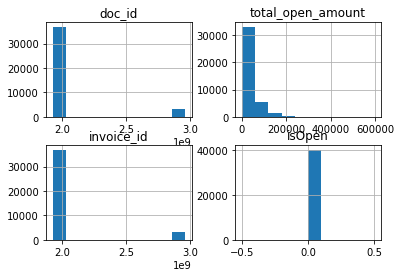

In [27]:
dt1.hist()
plt.show()

In [28]:
dt1.corr()

,doc_id,total_open_amount,invoice_id,isOpen
doc_id,1.000000,0.174095,1.000000,NaN
total_open_amount,0.174095,1.000000,0.174095,NaN
invoice_id,1.000000,0.174095,1.000000,NaN
isOpen,NaN,NaN,NaN,NaN


In [29]:
dt1.describe()

,doc_id,total_open_amount,invoice_id,isOpen
count,3.999800e+04,39998.000000,3.999800e+04,39998.0
mean,2.010984e+09,31936.897170,2.010984e+09,0.0
std,2.762669e+08,39319.584571,2.762669e+08,0.0
min,1.928502e+09,0.830000,1.928502e+09,0.0
25%,1.929172e+09,4575.225000,1.929172e+09,0.0
50%,1.929724e+09,17244.235000,1.929724e+09,0.0
75%,1.930207e+09,46611.550000,1.930207e+09,0.0
max,2.960618e+09,594540.260000,2.960618e+09,0.0


In [30]:
dt1.isnull().sum()

clear_date                0
doc_id                    0
document_create_date      0
document_create_date.1    0
due_in_date               0
total_open_amount         0
baseline_create_date      0
invoice_id                0
isOpen                    0
dtype: int64

In [31]:
dt1['isOpen']=='1'

1        False
2        False
3        False
4        False
5        False
         ...  
49995    False
49996    False
49997    False
49998    False
49999    False
Name: isOpen, Length: 39998, dtype: bool

In [32]:
dt1=dt1.drop(["isOpen","doc_id"],axis=1)

In [33]:
dt1['clear_date']=dt1['clear_date'].map(dt.datetime.toordinal)
dt1['document_create_date']=dt1['document_create_date'].map(dt.datetime.toordinal)
dt1['document_create_date.1']=dt1['document_create_date.1'].map(dt.datetime.toordinal)
dt1['due_in_date']=dt1['due_in_date'].map(dt.datetime.toordinal)
dt1['baseline_create_date']=dt1['baseline_create_date'].map(dt.datetime.toordinal)

In [34]:
dt1

,clear_date,document_create_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,invoice_id
1,737273,737260,737263,737278,5363.35,737263,1.929643e+09
2,737459,737445,737444,737459,60179.38,737444,1.930417e+09
3,737195,737178,737178,737193,16817.19,737178,1.929226e+09
4,737460,737444,737445,737460,37293.99,737445,1.930414e+09
5,737298,737280,737283,737298,107280.17,737283,1.929726e+09
...,...,...,...,...,...,...,...
49995,737342,737328,737327,737342,44953.83,737327,1.929928e+09
49996,737273,737257,737259,737274,56746.80,737259,1.929633e+09
49997,737347,737329,737329,737344,189.82,737329,1.929938e+09
49998,737405,737394,737394,737407,37021.50,737397,2.960597e+09


In [35]:
dt1.corr()

,clear_date,document_create_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,invoice_id
clear_date,1.000000,0.993624,0.993801,0.995908,0.017325,0.993913,0.009966
document_create_date,0.993624,1.000000,0.999917,0.996065,0.023361,0.999709,0.007302
document_create_date.1,0.993801,0.999917,1.000000,0.996227,0.022062,0.999794,0.005179
due_in_date,0.995908,0.996065,0.996227,1.000000,0.016909,0.996279,-0.002051
total_open_amount,0.017325,0.023361,0.022062,0.016909,1.000000,0.024764,0.174095
baseline_create_date,0.993913,0.999709,0.999794,0.996279,0.024764,1.000000,0.013149
invoice_id,0.009966,0.007302,0.005179,-0.002051,0.174095,0.013149,1.000000


In [36]:
x=dt1.drop('baseline_create_date',axis=1)
y=dt1['baseline_create_date']

In [37]:
x

,clear_date,document_create_date,document_create_date.1,due_in_date,total_open_amount,invoice_id
1,737273,737260,737263,737278,5363.35,1.929643e+09
2,737459,737445,737444,737459,60179.38,1.930417e+09
3,737195,737178,737178,737193,16817.19,1.929226e+09
4,737460,737444,737445,737460,37293.99,1.930414e+09
5,737298,737280,737283,737298,107280.17,1.929726e+09
...,...,...,...,...,...,...
49995,737342,737328,737327,737342,44953.83,1.929928e+09
49996,737273,737257,737259,737274,56746.80,1.929633e+09
49997,737347,737329,737329,737344,189.82,1.929938e+09
49998,737405,737394,737394,737407,37021.50,2.960597e+09


In [38]:
y

1        737263
2        737444
3        737178
4        737445
5        737283
          ...  
49995    737327
49996    737259
49997    737329
49998    737397
49999    737193
Name: baseline_create_date, Length: 39998, dtype: int64

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1)

In [40]:
dt1.dtypes

clear_date                  int64
document_create_date        int64
document_create_date.1      int64
due_in_date                 int64
total_open_amount         float64
baseline_create_date        int64
invoice_id                float64
dtype: object

In [41]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [42]:
MSE_Score = []
R2_Score = []
Algorithm = []
score_train=[]
score_test=[]

In [43]:
Algorithm.append('Linear Regression')
model1 = LinearRegression()
model1.fit(x_train, y_train)


LinearRegression()

In [44]:
y_predict = model1.predict(x_test)
y_predict
score_train.append(model1.score(x_train,y_train))

In [45]:
score_test.append(model1.score(x_test,y_test))

In [46]:
MSE_Score.append(mean_squared_error(y_test, y_predict))
R2_Score.append(r2_score(y_test, y_predict))

In [47]:
Algorithm.append('Support Vector Regression')
clf2 = SVR()
clf2.fit(x_train, y_train)
predicted = clf2.predict(x_test)
score_train.append(clf2.score(x_train,y_train))

In [48]:
score_test.append(clf2.score(x_test,y_test))

In [49]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

In [50]:
Algorithm.append('Decision Tree Regressor')
clf3 = DecisionTreeRegressor()
clf3.fit(x_train, y_train)
predicted = clf3.predict(x_test)
score_train.append(clf3.score(x_train,y_train))

In [51]:
score_test.append(clf3.score(x_test,y_test))

In [52]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

In [53]:
Algorithm.append('Random Forest Regressor')
clf4 = RandomForestRegressor()
clf4.fit(x_train, y_train)
predicted = clf4.predict(x_test)
score_train.append(clf4.score(x_train,y_train))

In [54]:
score_test.append(clf4.score(x_test,y_test))

In [55]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

In [56]:
Algorithm.append('XGB Regressor')
clf5 = xgb.XGBRegressor()
clf5.fit(x_train, y_train)
predicted = clf5.predict(x_test)
score_train.append(clf5.score(x_train,y_train))

In [57]:
score_test.append(clf5.score(x_test,y_test))

In [58]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

In [59]:
Comparison = pd.DataFrame(list(zip(Algorithm, MSE_Score, R2_Score,score_train,score_test)), columns = ['Algorithm', 'MSE_Score', 'R2_Score','score_train','score_test'])

In [60]:
Comparison

,Algorithm,MSE_Score,R2_Score,score_train,score_test
0,Linear Regression,4.857347,0.999658,0.999672,0.999658
1,Support Vector Regression,67.070585,0.995280,0.995746,0.995280
2,Decision Tree Regressor,3.957250,0.999721,1.000000,0.999721
3,Random Forest Regressor,2.916335,0.999795,0.999976,0.999795
4,XGB Regressor,2.872995,0.999798,0.999937,0.999798


In [61]:
models = []
models.append(('LR', LinearRegression()))
models.append(('SVR', SVR()))
models.append(('RFR', RandomForestRegressor()))
models.append(('DTR', DecisionTreeRegressor()))
models.append(('XGB', xgb.XGBRegressor()))

In [62]:
dt1

,clear_date,document_create_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,invoice_id
1,737273,737260,737263,737278,5363.35,737263,1.929643e+09
2,737459,737445,737444,737459,60179.38,737444,1.930417e+09
3,737195,737178,737178,737193,16817.19,737178,1.929226e+09
4,737460,737444,737445,737460,37293.99,737445,1.930414e+09
5,737298,737280,737283,737298,107280.17,737283,1.929726e+09
...,...,...,...,...,...,...,...
49995,737342,737328,737327,737342,44953.83,737327,1.929928e+09
49996,737273,737257,737259,737274,56746.80,737259,1.929633e+09
49997,737347,737329,737329,737344,189.82,737329,1.929938e+09
49998,737405,737394,737394,737407,37021.50,737397,2.960597e+09


In [63]:
clear_date=input("Enter Clear date: ")
document_create_date=input("Enter document_create_date : ")
document_create_date_1=input("Enter document_create_date.1 : ")
due_in_date=input("Enter due_in_date : ")
total_open_amount=input("Enter total_open_amount : ")
invoice_id=input("Enter invoice_id : ")


Enter Clear date: 2019-08-02
Enter document_create_date : 2019-07-20
Enter document_create_date.1 : 2019-07-23
Enter due_in_date : 2019-08-07
Enter total_open_amount : 5363.35
Enter invoice_id : 1.929643e+09


In [65]:
clear_date=dt.date.toordinal({clear_date})
document_create_date=dt.date.toordinal({document_create_date})
document_create_date_1=dt.date.toordinal({document_create_date_1})
due_in_date=dt.date.toordinal({due_in_date})



TypeError: descriptor 'toordinal' for 'datetime.date' objects doesn't apply to a 'set' object

In [ ]:
y_pred=model1.predict((sc.transform(np.array([[clear_date,document_create_date,document_create_date_1,due_in_date,total_open_amount,invoice_id]]))))

In [ ]:
y_pred[0]

In [ ]:
date=dt.date.fromordinal(737180)

In [ ]:
print(date)